In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df_match = pd.read_csv('./hnd_male_csv2/1252666.csv')

In [19]:
df_match.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1252666,2021,2021-07-22,"Kennington Oval, London",1,0.1,Oval Invincibles,Manchester Originals,JJ Roy,SM Curran,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1252666,2021,2021-07-22,"Kennington Oval, London",1,0.2,Oval Invincibles,Manchester Originals,JJ Roy,SM Curran,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1252666,2021,2021-07-22,"Kennington Oval, London",1,0.3,Oval Invincibles,Manchester Originals,SM Curran,JJ Roy,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1252666,2021,2021-07-22,"Kennington Oval, London",1,0.4,Oval Invincibles,Manchester Originals,SM Curran,JJ Roy,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1252666,2021,2021-07-22,"Kennington Oval, London",1,0.5,Oval Invincibles,Manchester Originals,SM Curran,JJ Roy,...,0,NaN,NaN,NaN,NaN,NaN,bowled,SM Curran,NaN,NaN
5,1252666,2021,2021-07-22,"Kennington Oval, London",1,1.1,Oval Invincibles,Manchester Originals,SP Narine,JJ Roy,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1252666,2021,2021-07-22,"Kennington Oval, London",1,1.2,Oval Invincibles,Manchester Originals,SP Narine,JJ Roy,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
7,1252666,2021,2021-07-22,"Kennington Oval, London",1,1.3,Oval Invincibles,Manchester Originals,JJ Roy,SP Narine,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1252666,2021,2021-07-22,"Kennington Oval, London",1,1.4,Oval Invincibles,Manchester Originals,JJ Roy,SP Narine,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1252666,2021,2021-07-22,"Kennington Oval, London",1,1.5,Oval Invincibles,Manchester Originals,SP Narine,JJ Roy,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_match.dtypes

match_id                    int64
season                      int64
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
dtype: object

In [21]:
df_match['runs_off_bat']

0      0
1      1
2      0
3      6
4      0
      ..
202    2
203    0
204    1
205    2
206    2
Name: runs_off_bat, Length: 207, dtype: int64

In [22]:
df_match['ball_in_over'] = df_match['ball'].astype(str).str.split('.').str[1].astype(int)

In [31]:
df_match['is_4'] = (df_match['runs_off_bat'] == 4).astype(int)
df_match['is_6'] = (df_match['runs_off_bat'] == 6).astype(int)
df_match['is_wicket'] = df_match.player_dismissed.notna().astype(int)

In [39]:
summary_by_ball = df_match.groupby('ball_in_over').agg({
    'runs_off_bat': ['mean', 'sum', 'count'],
    'extras': 'sum',
    'is_4': 'sum',
    'is_6':'sum',
    'is_wicket': 'sum'
})

In [40]:
summary_by_ball

runs_off_bat           extras is_4 is_6 is_wicket
                     mean sum count    sum  sum  sum       sum
ball_in_over                                                  
1                1.125000  45    40      2    6    0         4
2                1.425000  57    40      4    5    2         2
3                1.025000  41    40      6    5    0         2
4                1.600000  64    40      1    5    4         3
5                1.250000  50    40      2    4    1         4
6                1.333333   8     6      0    1    0         0
7                1.000000   1     1      0    0    0         0

In [53]:
import os
import glob

folder_path = "hnd_male_csv2/"

all_dfs = []

csv_files = [
    file for file in glob.glob(os.path.join(folder_path, "*.csv"))
    if not file.endswith("_info.csv")
]

In [55]:
for file in csv_files:
    try:
        df = pd.read_csv(file)
        all_dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

In [56]:
full_df = pd.concat(all_dfs, ignore_index=True)

In [59]:
full_df.shape

(50684, 22)

In [60]:
full_df.to_parquet('ball_by_ball_all_games.parquet')

In [61]:
full_df['runs_off_bat']

0        0
1        2
2        0
3        0
4        0
        ..
50679    4
50680    0
50681    4
50682    0
50683    0
Name: runs_off_bat, Length: 50684, dtype: int64

In [66]:
full_df['ball_in_over'] = full_df['ball'].astype(str).str.split('.').str[1].astype(int)

In [67]:
full_df['is_4'] = (full_df['runs_off_bat'] == 4).astype(int)
full_df['is_6'] = (full_df['runs_off_bat'] == 6).astype(int)
full_df['is_Wicket'] = full_df['player_dismissed'].notna().astype(int)

In [69]:
summary_by_ball = full_df.groupby('ball_in_over').agg(
    {
    'runs_off_bat': ['mean', 'sum', 'count'],
    'extras': 'sum',
    'is_4': 'sum',
    'is_6':'sum',
    'is_Wicket': 'sum'
    }
)

In [70]:
summary_by_ball

runs_off_bat              extras  is_4 is_6 is_Wicket
                     mean    sum count    sum   sum  sum       sum
ball_in_over                                                      
1                1.257230  12346  9820    890  1048  458       578
2                1.353133  13258  9798    814  1212  540       640
3                1.357084  13256  9768    808  1114  588       650
4                1.311563  12772  9738    808  1108  546       640
5                1.321429  12802  9688    808  1074  544       554
6                1.465000   2344  1600    130   186  118       108
7                1.556522    358   230     26    34   16        14
8                2.388889     86    36      0    10    4         0
9                1.666667     10     6      0     2    0         2

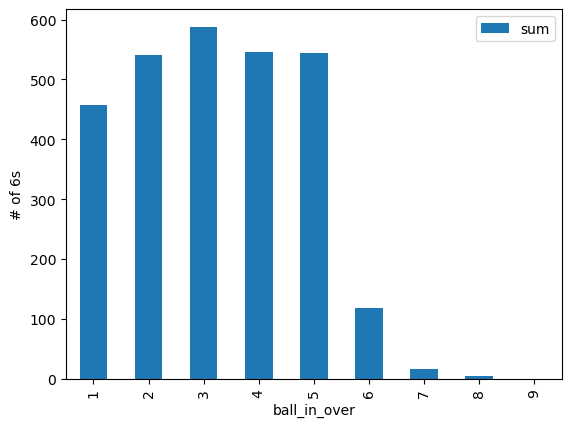

In [80]:
summary_by_ball.plot.bar(y = 'is_6')
plt.ylabel('# of 6s')
plt.show()

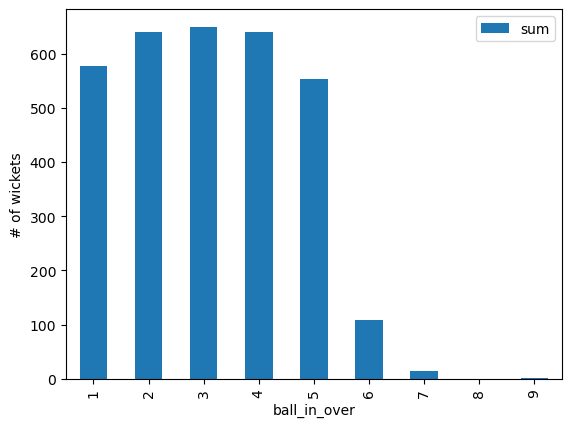

In [81]:
summary_by_ball.plot.bar(y = 'is_Wicket')
plt.ylabel('# of wickets')
plt.show()